In [28]:
import sys
assert sys.version_info >= (3,7)

import numpy as np
import cv2 as cv
from util_func import *
img = cv.imread("images/boat.jpg")
img_copy = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

_, th2 = cv.threshold(img_copy, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

white = cv.findNonZero(th2)

x, y, w, h = cv.boundingRect(white)

cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv.imshow("Image with Bounding Box", img)
cv.waitKey(0)
cv.destroyAllWindows()


In [10]:
img = cv.imread("images/leaf.jfif",0)
# trackbar function and while loop
def nothing(x):
    pass
wn = "window"
cv.namedWindow(wn)
cv.createTrackbar("size", wn, 3, 10,  nothing)
cv.createTrackbar("iter", wn , 3, 10, nothing)

while (1):
    size = cv.getTrackbarPos("size", wn)
    if size < 3:
        size=3
    iteration =cv.getTrackbarPos("iter", wn)
    if iteration <1:
        iteration = 1
    #define the kernel
    kernel = np.ones((size,size),dtype=np.uint8)
    #erosion
    dilation = cv.dilate(img, kernel,iterations= iteration)
    
    cv.imshow(wn,dilation)
    k = cv.waitKey(1) & 0xFF
    if k==27:
        break
cv.destroyAllWindows()

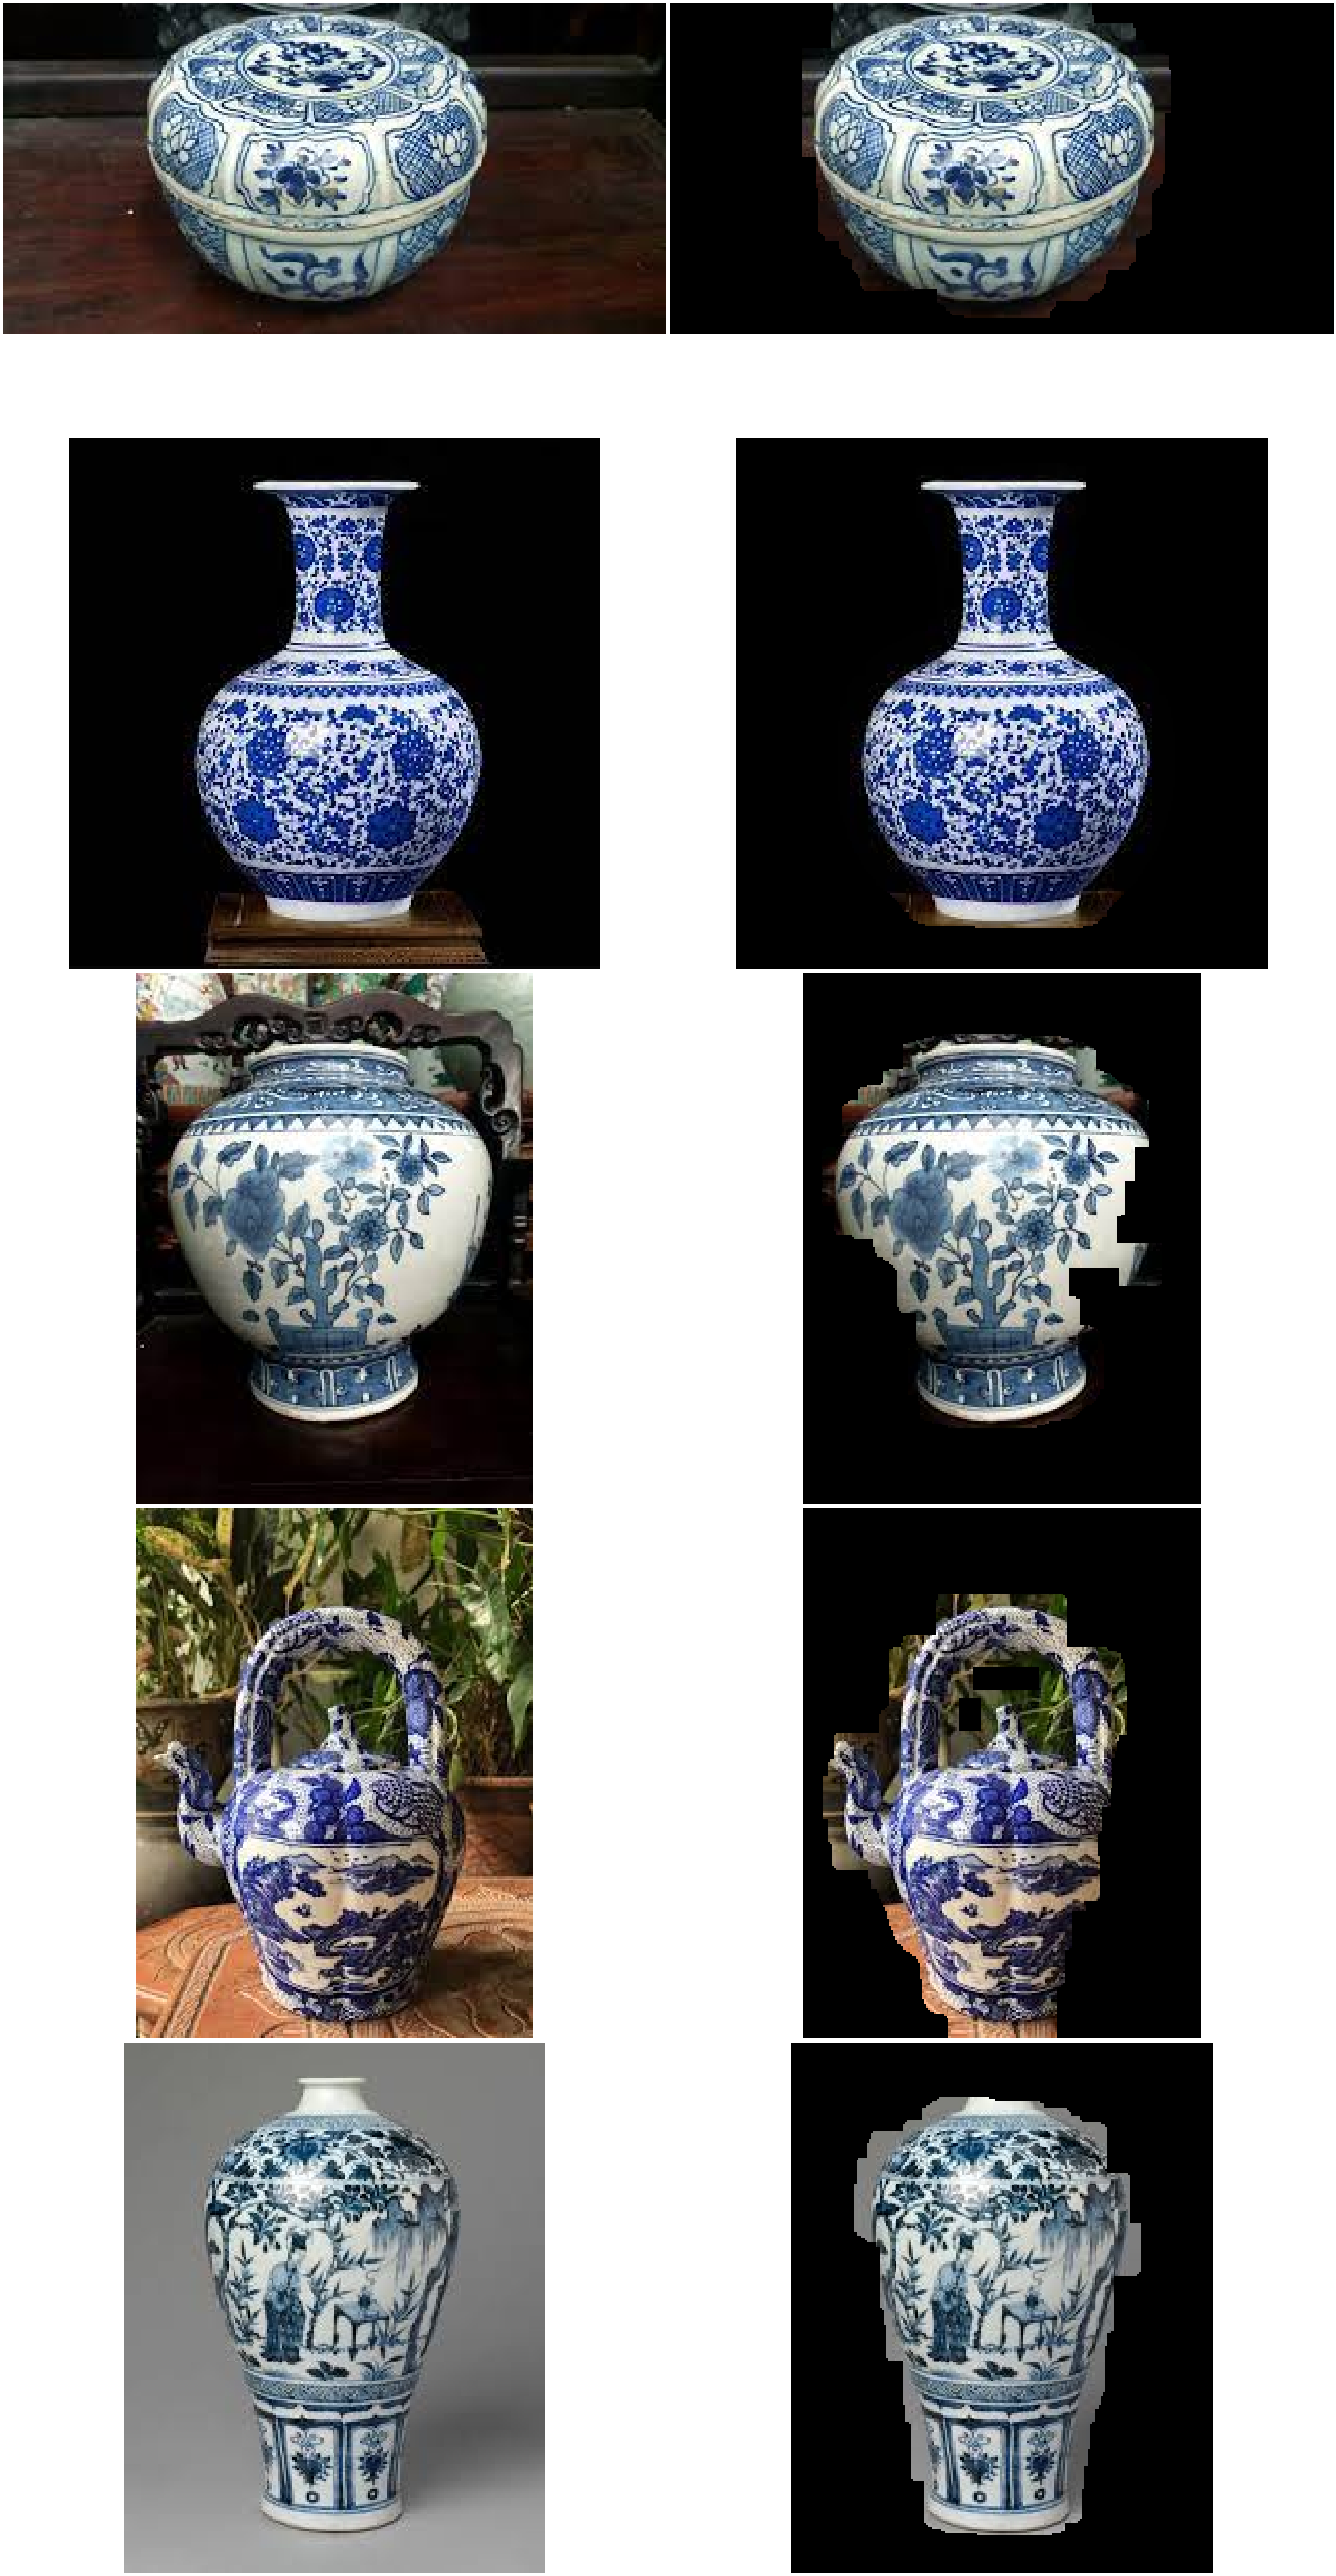

In [27]:
blue_low =(100, 50, 50)
blue_high=(130, 255, 255)
def color_seg(img,color_low,color_high , smooth= True):
    img_ori = img.copy()
    if smooth:
        img = cv.GaussianBlur(img,(5,5),0)
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    mask = cv.inRange(img_hsv, color_low, color_high)
    kernel = np.ones((3,3),dtype=np.uint8)

    mask = cv.dilate(mask,kernel, iterations = 15)
    mask = cv.erode(mask,kernel, iterations = 5)
    colormap = cv.applyColorMap(mask, cv.COLORMAP_HOT)
    return cv.bitwise_and(img_ori,img_ori, mask=mask)


imgs=[]
for i in range(1,6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)
res=[color_seg(img,blue_low,blue_high) for img in imgs]
fig ,ax = plt.subplots(5,2,figsize=(50,100))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")
plt.tight_layout()

plt.show()